In [1]:
### fine tuning

import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

base_dir = './data/cat_dog_full'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datgen = ImageDataGenerator(rescale=1/256,
                                  rotation_range=40,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True)

validaton_datgen = ImageDataGenerator(rescale=1/256)

train_generator = train_datgen.flow_from_directory(
    train_dir,
    classes=['cats', 'dogs'], # 명시하지 않으면 순서대로 0부터 매겨짐
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

validation_generator = validaton_datgen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'], # 명시하지 않으면 순서대로 0부터 매겨짐
    target_size = (150,150),
    batch_size = 100,
    class_mode = 'binary'
)

# Pretrained Newtwork
model_base = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(150,150,3))

model_base.trainable=False # pretrained network의 param을 학습시키지 않고 동결시키기 위한 코드

model = Sequential()

model.add(model_base)

model.add(Flatten(input_shape=(4*4*512,))) 

model.add(Dense(units=256,
                activation='relu',))
model.add(Dropout(0.6))
model.add(Dense(units=1,
                activation='sigmoid'))

model.summary()

model.compile(optimizer=RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=140,
                    epochs=30,
                    validation_data = validation_generator,
                    validation_steps=60)

# 동결 해제
model_base.trainable  = True

for layer in model_base.layers:
    if layer.name in ['block5_conv1', 'block5_conv2', 'block5_conv1']:
        layer.trainable = True
    else:
        layer.trainable = False

# 일반적으로 learning_rate를 더 작게 설정
model.compile(optimizer=RMSprop(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=140,
                    epochs=30,
                    validation_data = validation_generator,
                    validation_steps=60)

Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/30
140/14

140/140 [==============================] - 120s 853ms/step - loss: 0.1873 - accuracy: 0.9236 - val_loss: 0.1560 - val_accuracy: 0.9393
Epoch 20/30
140/140 [==============================] - 119s 848ms/step - loss: 0.1828 - accuracy: 0.9216 - val_loss: 0.1531 - val_accuracy: 0.9385
Epoch 21/30
140/140 [==============================] - 119s 852ms/step - loss: 0.1731 - accuracy: 0.9277 - val_loss: 0.1645 - val_accuracy: 0.9330
Epoch 22/30
140/140 [==============================] - 119s 849ms/step - loss: 0.1674 - accuracy: 0.9315 - val_loss: 0.1468 - val_accuracy: 0.9412
Epoch 23/30
140/140 [==============================] - 119s 850ms/step - loss: 0.1704 - accuracy: 0.9283 - val_loss: 0.2021 - val_accuracy: 0.9257
Epoch 24/30
140/140 [==============================] - 119s 849ms/step - loss: 0.1764 - accuracy: 0.9271 - val_loss: 0.1585 - val_accuracy: 0.9377
Epoch 25/30
140/140 [==============================] - 119s 852ms/step - loss: 0.1603 - accuracy: 0.9359 - val_loss: 0.2001 - val_

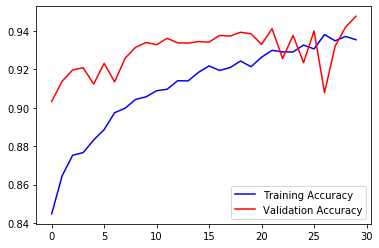

In [3]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.plot(train_acc, color='b', label='Training Accuracy')
plt.plot(val_acc, color='r', label='Validation Accuracy')

# plt.plot(train_loss, color='b', label='Training Loss')
# plt.plot(val_loss, color='r', label='Validation Loss')

plt.legend()
plt.show()


